In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Decision Tree/churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
X = data.drop(columns=['churn','customer_id'])
Y = data['churn']

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 0.36776943,  1.10221897, -0.80262961, ..., -0.14777343,
        -0.29131276, -0.27285206],
       [-0.01005188, -0.36182226, -0.80262961, ..., -0.0866856 ,
        -0.30670662, -0.26243794],
       [-1.42875841, -0.36182226,  1.2459047 , ..., -0.13641792,
         0.43666083,  0.38937211],
       ...,
       [ 1.48371848, -0.84983601,  1.2459047 , ..., -0.10749986,
        -0.1749333 , -0.16646506],
       [-1.40749032, -0.05681367, -0.80262961, ..., -0.14492929,
         2.75212419,  2.40185319],
       [-0.1238987 , -1.8258635 , -0.80262961, ..., -0.10432125,
        -0.24312858, -0.18695195]])

In [5]:
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test = tts(X , Y , train_size = 0.80,stratify = Y)
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# **Model Building and Predictions**

In [6]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(class_weight = 'balanced')
classifier = DTC()

In [7]:
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)
predicted_values[:40]

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_train , predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [9]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3559
           1       0.41      0.41      0.41       855

    accuracy                           0.77      4414
   macro avg       0.64      0.64      0.64      4414
weighted avg       0.77      0.77      0.77      4414



# **Visualizing Decision Tree**

In [13]:
# First install graphviz with pip install graphviz
from sklearn.tree import export_graphviz
'''
decision tree is the model created
max_depth is the maximum depth of the decision tree to be stored
feature_names is the name of the variables passed
'''
export_graphviz(decision_tree = classifier , out_file = 'tree_viz',
                max_depth = None , feature_names = X.columns , label = None , impurity = False)

In [12]:
from graphviz import render
render(filepath = '/content/tree_viz',format = 'png',engine = 'neato')

'/content/tree_viz.png'

# Improving Model Performance

## Hyperparameters Tuning

In [14]:
classifier = DTC()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# **Max Depth**

In [22]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
  model.fit(x1,y1)
  
  predictions = model.predict(x1)
  f1 = f1_score(y1,predictions)

  predictions = model.predict(x2)
  f2 = f1_score(y2 , predictions)
  
  return f1 , f2

In [27]:
def effect(train_score , test_score , x_axis , title):
  # x_axis = list of parameters used to generate the respective f1 scores on the y-axis
  plt.figure(dpi = 100 , figsize=(7,5))
  plt.plot(x_axis,train_score,color = 'red',label='Train score')
  plt.plot(x_axis,test_score,color ='green',label='Test score')
  plt.title(title)
  plt.xlabel('Parameter values')
  plt.ylabel('f1 score')
  plt.legend()
  plt.show()

In [23]:
# limit the depth
maxdepth = [i for i in range(1,50)]
train = []
test = []

for i in maxdepth:
  model = DTC(class_weight='balanced',max_depth=i,random_state=42)
  f1 , f2 = calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

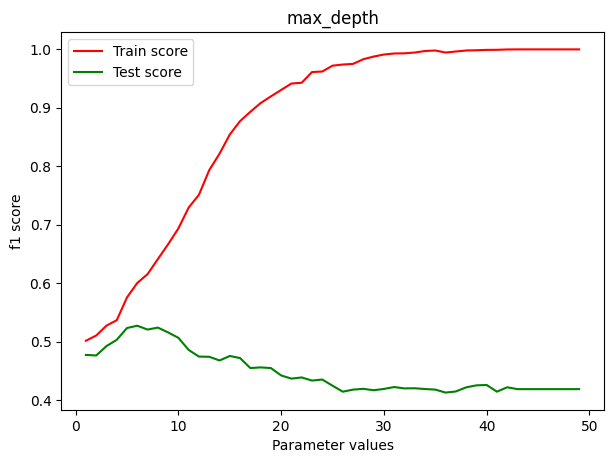

In [28]:
effect(train,test,range(1,50),'max_depth')

## **Min_sample_split**

In [29]:
min_sample = [i for i in range(2,5000,25)]
train = []
test = []

for i in min_sample:
  model = DTC(class_weight='balanced',min_samples_split=i,random_state=42)
  f1 , f2 = calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

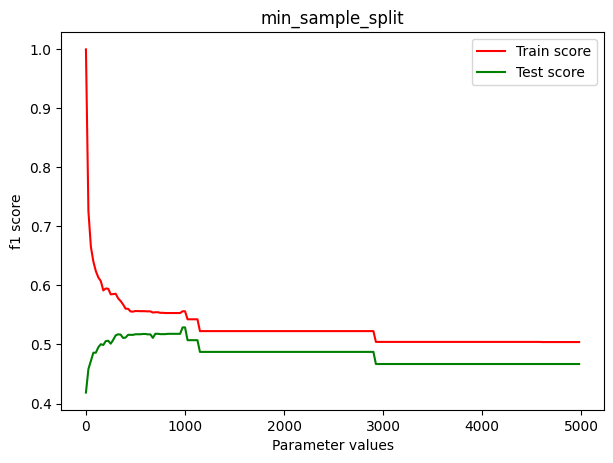

In [31]:
effect(train,test,range(2,5000,25),'min_sample_split')
#We see there is a dip in both train score and test score when the parameters are too high
#Thus we choose the range under 1000 since it the difference between the scores are optimal

## **max_leaf_nodes**

In [32]:
max_leafnodes = [i for i in range(2,200,10)]
train = []
test = []

for i in max_leafnodes:
  model = DTC(class_weight='balanced',max_leaf_nodes=i,random_state=42)
  f1 , f2 = calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

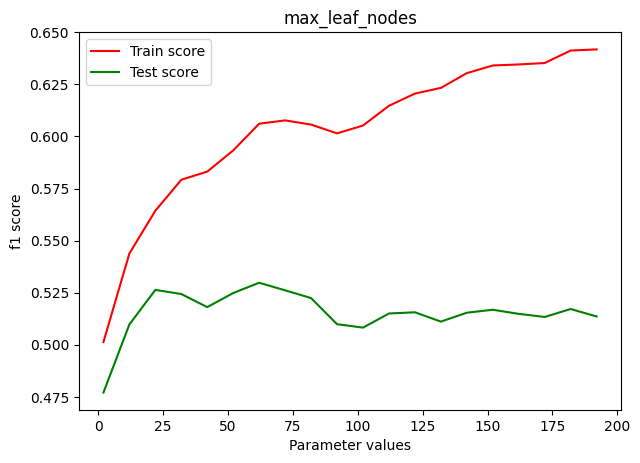

In [33]:
effect(train,test,range(2,200,10),'max_leaf_nodes')

## **min_sample_leaf**

In [36]:
min_sampleleaf = [i for i in range(2,4000,25)]
train = []
test = []

for i in min_sampleleaf:
  model = DTC(class_weight='balanced',min_samples_leaf=i,random_state=42)
  f1 , f2 = calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

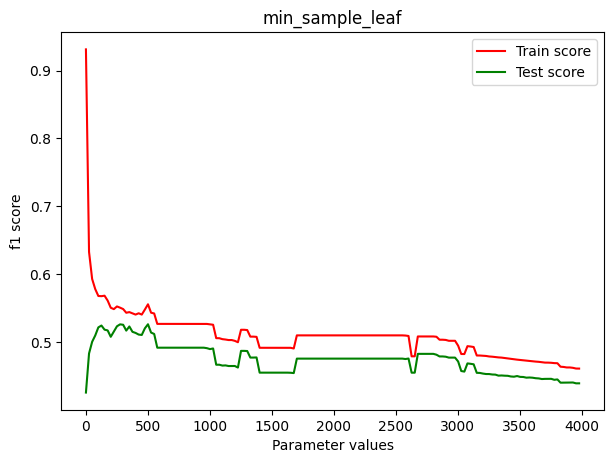

In [37]:
effect(train,test,range(2,4000,25),'min_sample_leaf')

# **Feature Importance**

In [40]:
model = DTC(max_depth=9)
model.fit(x_train,y_train)
feature_imp = pd.Series(model.feature_importances_,index=X.columns)
K=feature_imp.sort_values()

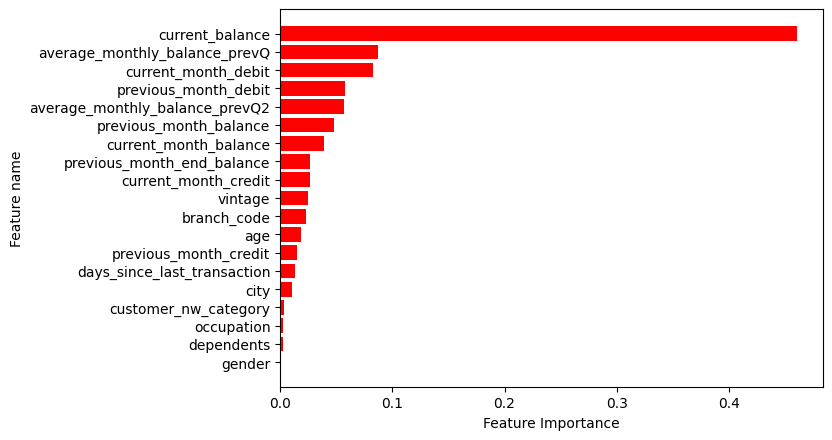

In [41]:
plt.figure(dpi =100,figsize=(7,5))
plt.barh(K.index,K,color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Feature name')
plt.show()